In [1]:
import nltk, gensim, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from scipy import stats

sns.set_context('talk')

C:\Users\Work_Remote\anaconda3\envs\craigslist-recommender\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
df = 

In [7]:
processed_data = gensim.parsing.preprocess_documents(raw_data.BODY)

In [8]:
processed_data[0][0:25]

['big',
 'bedroom',
 'fulli',
 'renov',
 'shrewsburi',
 'street',
 'larg',
 'bedroom',
 'modern',
 'eat',
 'kitchen',
 'luxuri',
 'tile',
 'bathroom',
 'washer',
 'dryer',
 'hookup',
 'effici',
 'ga',
 'heat',
 'high',
 'ceil',
 'walk',
 'closet',
 'new']

In [9]:
processed_df = pd.DataFrame([' '.join(w) for w in processed_data], columns = ['Description'])

In [10]:
processed_df.head()

,Description
0,big bedroom fulli renov shrewsburi street larg...
1,properti info rent monthb bath avail date pet ...
2,properti info rent monthb bath avail date nowp...
3,properti info rent monthb bath avail date pet ...
4,properti info rent monthb bath avail date pet ...


In [11]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134854 entries, 0 to 134853
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  134854 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [2]:
#Instantiate DataFrame of craigslist data
raw_data = pd.read_csv('data\\CRAIGSLIST.Listings-1.csv')

In [14]:
bow_vectorizer = CountVectorizer(stop_words = 'english')
bow_matrix = bow_vectorizer.fit_transform(raw_data.BODY)
bow_matrix.shape

(134854, 71414)

In [15]:
bigram_vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
bigram_matrix = bigram_vectorizer.fit_transform(raw_data.BODY)
bigram_matrix.shape

(134854, 757269)

In [16]:
unibitri_vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (1,3))
unibitri_matrix = unibitri_vectorizer.fit_transform(raw_data.BODY)
unibitri_matrix.shape

(134854, 2642003)

In [18]:
tfidf_vectorizer = TfidfVectorizer(min_df = 2, max_df = 0.7)
tfidf_matrix = tfidf_vectorizer.fit_transform(raw_data.BODY)
tfidf_matrix.shape

(134854, 40243)

## More Vectorizations and Tokenizations

## Future PreProcessing: Remove HTML/XML tags, Replace accented characters, Correct Spelling Errors

In [46]:
count_vectorizer = CountVectorizer(stop_words = 'english')

In [47]:
count_data = count_vectorizer.fit_transform(listings_df.BODY)

In [48]:
count_data.shape

(134854, 71414)

In [49]:
count_df = pd.DataFrame(count_data.sum(axis = 0)).T

In [50]:
count_df.index = count_vectorizer.get_feature_names()

In [51]:
count_df.head(25)

,0
00,20223
000,4480
0001,1
0002,2
0004,3
0005,13
0006,248
0008,1
000beds,7
000deposit,1


In [72]:
count_df.columns = ['Count']
sorted_word_count = count_df.sort_values(by = 'Count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

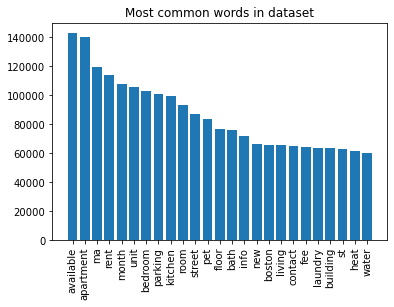

In [78]:
plt.bar(sorted_word_count[:25].index, sorted_word_count[:25].Count)
plt.xticks(rotation = 90)
plt.title('Most common words in dataset')
plt.show

#### The most common words are as expected for a set of real estate listings in Massachusetts.

#### A more complex vectorization such as tf-idf can prevent these words from dominating models and similarity measures.

In [85]:
words_per_doc_df = pd.DataFrame(count_data.sum(axis = 1))
words_per_doc_df.head()

,0
0,33
1,138
2,206
3,179
4,179


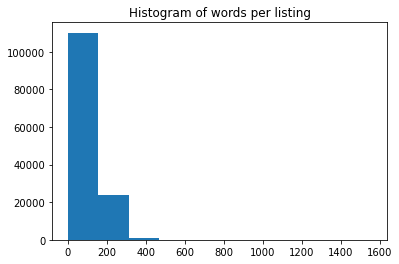

In [89]:
plt.hist(words_per_doc_df.values)
plt.title('Histogram of words per listing')
plt.show()